In [1]:
from LidarDataSet import LidarDataSet

import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'LidarDataSet'

PLOTTING


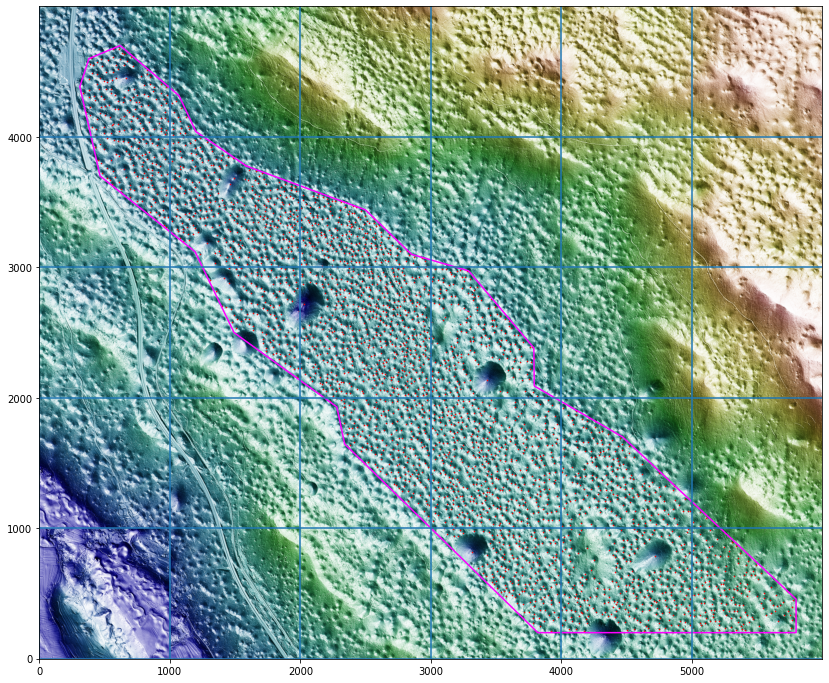

In [2]:
#------------------------------------------------------------------------------- this is what data looks like on a map
# data_segment_filenames = [["TM1_444_83", "TM1_445_83", "TM1_446_83"],
#                          ["TM1_444_82", "TM1_445_82", "TM1_446_82"],
#                          ["TM1_444_81", "TM1_445_81", "TM1_446_81"]]

#------------------------------------------------------------------------------- this is how it's represented in the memory
# data_segment_filenames = [["TM1_444_81","TM1_444_82" ,"TM1_444_83"],
#                           ["TM1_445_81","TM1_445_82" ,"TM1_445_83"],
#                           ["TM1_446_81","TM1_446_82" ,"TM1_446_83"]]

data_segment_filenames = [[f"TM1_{x}_{y}" for y in range(80,84+1)] for x in range(442,447+1)]

selected_range_points = [[1200, 4040],
                         [1586, 3777],
                         [2500, 3440],
                         [2852, 3100],
                         [3290, 2973],
                         [3790, 2382],
                         [3793, 2091],
                         [4470, 1700],
                         [6000, 270],
                         [6000, 0],
                         [4025, 0],
                         [2340, 1646],
                         [2280, 1930],
                         [1492, 2500],
                         [1193, 3120],
                         [465, 3700],
                         [310, 4385],
                         [380, 4600],
                         [619,4700],
                         [1070,4316]]

lds = LidarDataSet()
lds.load_dataset_from_npy("dataset2.npy")
lds.set_analyzed_region(selected_range_points)
lds.load_sinkholes_from_pkl("large_data1_sinkholes.pkl")
lds.plot(edges=False, centers=True, analyzed_region=True, verbose=False, fig_size=(16,12))

In [6]:
def quick_statistics(data, name=None, d_range=None, d_bins=20):
    plt.hist(data, bins=d_bins,range=d_range)
    if name:
        plt.title(name)
    plt.show()

    print(f"{name} mean: {np.mean(data):.2f} m\n",
          f"{name} stdev: {np.std(data):.2f} m\n",
          f"{name} stdev: {np.std(data):.2f} m\n",
          f"{name} max: {max(data):.2f} m\n",
          f"{name} min: {min(data):.2f} m")

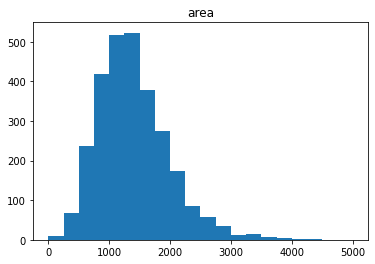

area mean: 1508.22 m
 area stdev: 1869.62 m
 area stdev: 1869.62 m
 area max: 48000.00 m
 area min: 157.05 m


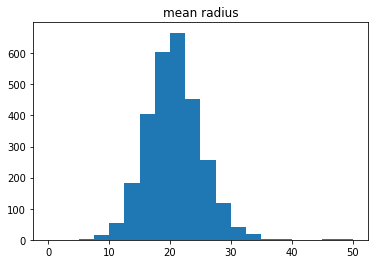

mean radius mean: 20.97 m
 mean radius stdev: 6.35 m
 mean radius stdev: 6.35 m
 mean radius max: 123.61 m
 mean radius min: 7.07 m


In [10]:
area_vals, radius_vals = lds.get_sinkhole_sizes()

quick_statistics(area_vals, name="area", d_range=(0,5_000))
quick_statistics(radius_vals, name="mean radius", d_range=(0,50))

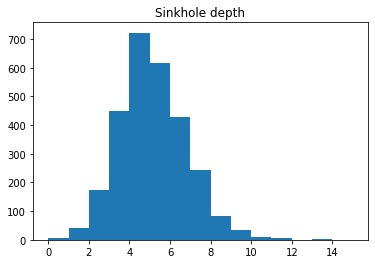

Sinkhole depth mean: 5.32 m
 Sinkhole depth stdev: 2.85 m
 Sinkhole depth stdev: 2.85 m
 Sinkhole depth max: 70.34 m
 Sinkhole depth min: 0.53 m


In [11]:
depth_vals = lds.get_depth_values()
quick_statistics(depth_vals, name="Sinkhole depth", d_range=(0,15), d_bins=15)

Text(0.5, 1.0, 'radius-depth relation')

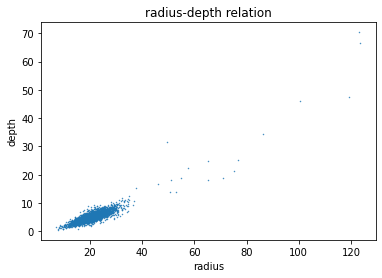

In [13]:
plt.scatter(radius_vals, depth_vals, s=0.2)
plt.xlabel("radius")
plt.ylabel("depth")
plt.title("radius-depth relation")

Text(0.5, 1.0, 'radius-depth relation')

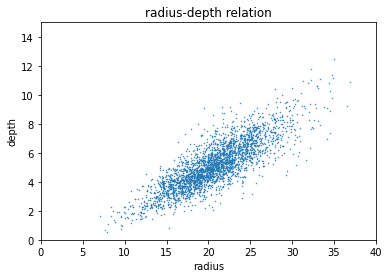

In [14]:
plt.scatter(radius_vals, depth_vals, s=0.2)
plt.xlim((0,40))
plt.ylim((0,15))
plt.xlabel("radius")
plt.ylabel("depth")
plt.title("radius-depth relation")

Text(0.5, 1.0, 'area-depth relation')

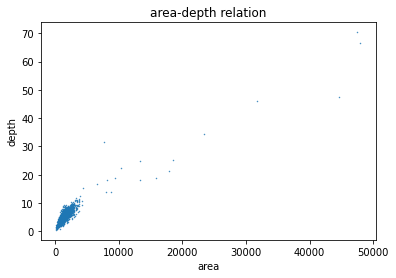

In [15]:
plt.scatter(area_vals, depth_vals, s=0.2)
plt.xlabel("area")
plt.ylabel("depth")
plt.title("area-depth relation")

Text(0.5, 1.0, 'area-depth relation')

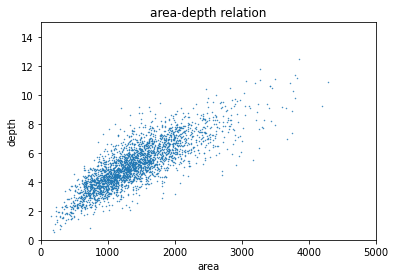

In [18]:
plt.scatter(area_vals, depth_vals, s=0.2)
plt.xlim((0,5000))
plt.ylim((0,15))
plt.xlabel("area")
plt.ylabel("depth")
plt.title("area-depth relation")